<img src="KITlogo_1c_deutsch-eps-converted-to.pdf" width="200" height="200" align="right"/>

##### Lehrstuhl für Analytics and Statistics (IOR)
##### Prof. Dr. Oliver Grothe
##### WS 2021

# Analyse multivariater Daten
## Übung 7


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import t
import scipy
import seaborn as sns
#!pip install seaborn --upgrade
import matplotlib.pyplot as plt
# Plotting
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style='darkgrid')

# Warnungen unterdrücken
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Betrachten Sie wieder den statstud Datensatz.

In [3]:

data=pd.read_csv('statstud.csv', sep=';',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,177,43.0,75.0,1,3,88,3.0,1.6,0,0,0.0,1,7.0
1,190,45.0,87.0,2,6,83,4.0,3.7,0,1,0.0,1,5.0
2,162,37.0,49.0,1,1,89,3.2,2.1,0,0,0.0,0,4.0
3,179,42.5,80.0,2,6,85,3.0,2.0,1,1,0.0,1,5.0
4,178,39.0,52.0,1,7,85,2.7,2.2,0,1,0.0,1,2.0


Benenne Variablen 

In [4]:
data = data.rename(columns={0: 'Größe', 1: 'Schuhgröße',2: 'Gewicht',3: 'm/w',4: 'Geburtsmonat', 5: 'Geburtsjahr',6: 'Statistik-A-Note',7: 'Abiturnote',8: 'Mathe-LK',9: 'Ausbildung',10: 'Studium',11: 'Eltern Akademiker',12: 'Computerkenntnisse'})
data.head()

# Or rename the existing DataFrame (rather than creating a copy) 
#data.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

,Größe,Schuhgröße,Gewicht,m/w,Geburtsmonat,Geburtsjahr,Statistik-A-Note,Abiturnote,Mathe-LK,Ausbildung,Studium,Eltern Akademiker,Computerkenntnisse
0,177,43.0,75.0,1,3,88,3.0,1.6,0,0,0.0,1,7.0
1,190,45.0,87.0,2,6,83,4.0,3.7,0,1,0.0,1,5.0
2,162,37.0,49.0,1,1,89,3.2,2.1,0,0,0.0,0,4.0
3,179,42.5,80.0,2,6,85,3.0,2.0,1,1,0.0,1,5.0
4,178,39.0,52.0,1,7,85,2.7,2.2,0,1,0.0,1,2.0


##### Stellen Sie alle Variablen mit einer geeigneten Visualisierungsmethode dar.

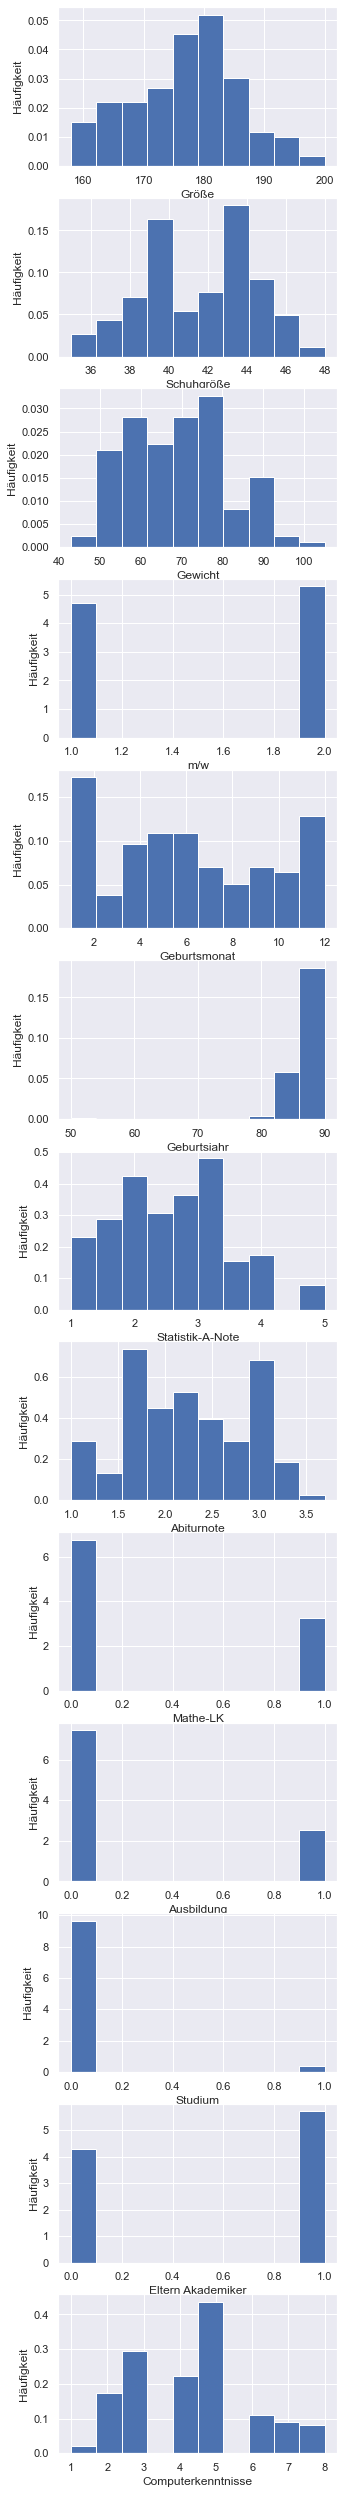

In [5]:
nvars=data.shape[1]


fig, axs = plt.subplots(nvars,figsize=(5,45))
for i in range(0,nvars):
    axs[i].hist(data.iloc[:,i],bins=10,density=True)
    axs[i].set_ylabel('Häufigkeit')
    axs[i].set_xlabel(data.columns[i])

plt.show()

<Figure size 1296x216 with 0 Axes>

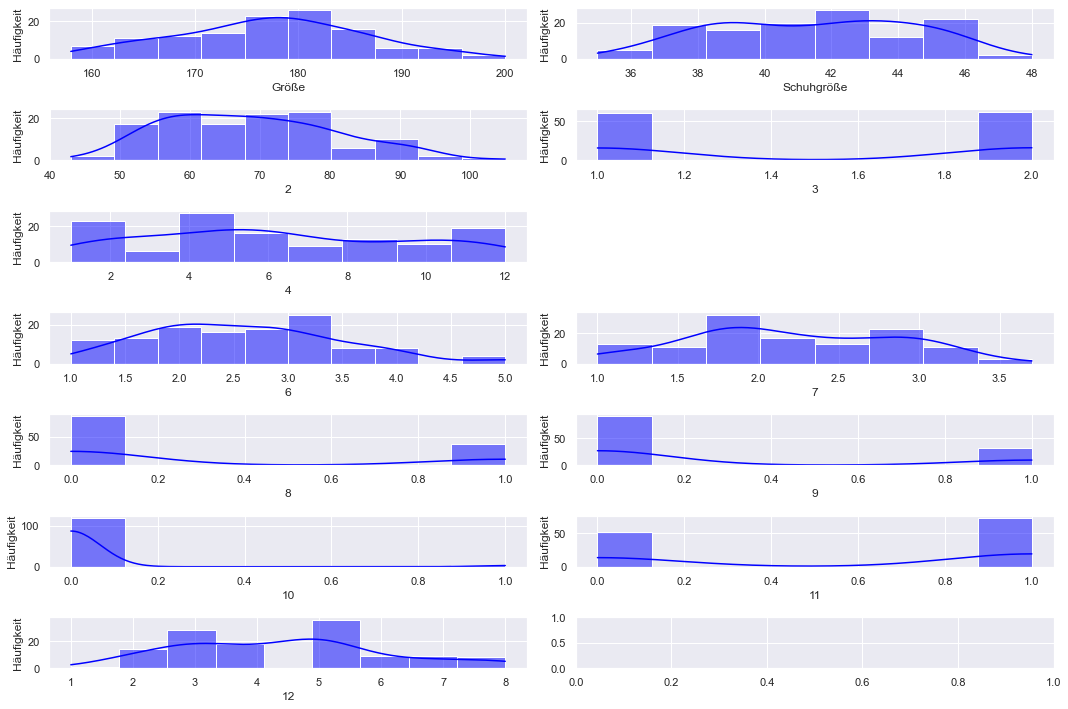

In [48]:
pos = [[0,0], [0,1], [1,0], [1,1], [2,0], [2,1], [3,0], [3,1], [4,0], [4,1], [5,0], [5,1], [6,0], [6,1], [7,0]]

plt.figure()
fig, axes = plt.subplots(7, 2)
fig.delaxes(axes[2, 1])
fig.set_figheight(10)
fig.set_figwidth(15)

i = 0
for var in data:
    ax = sns.histplot(data[var], kde=True, color='blue', ax=axes[pos[i][0], pos[i][1]])
    ax.set(ylabel='Häufigkeit')
    i += 1
    
plt.tight_layout()

plt.show()

##### Verdeutlichen Sie sich den Zusammenhang aller Variablen-Paare mithilfe einer geeigneten Visualisierungsmethode.

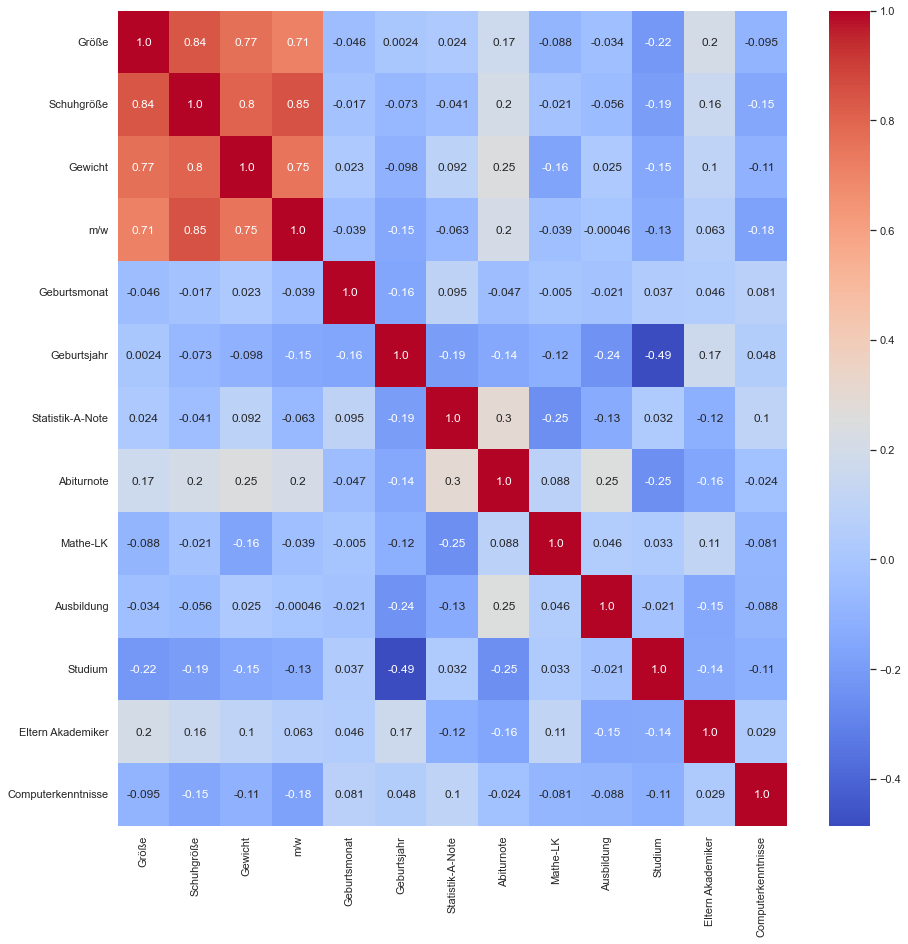

In [6]:
corr_df = data.iloc[:,:].corr()
corr_df = corr_df.astype(float)
plt.figure(figsize=(15,15                   ))
sns.heatmap(corr_df, annot=True, fmt='.2' ,cmap='coolwarm')
plt.show()

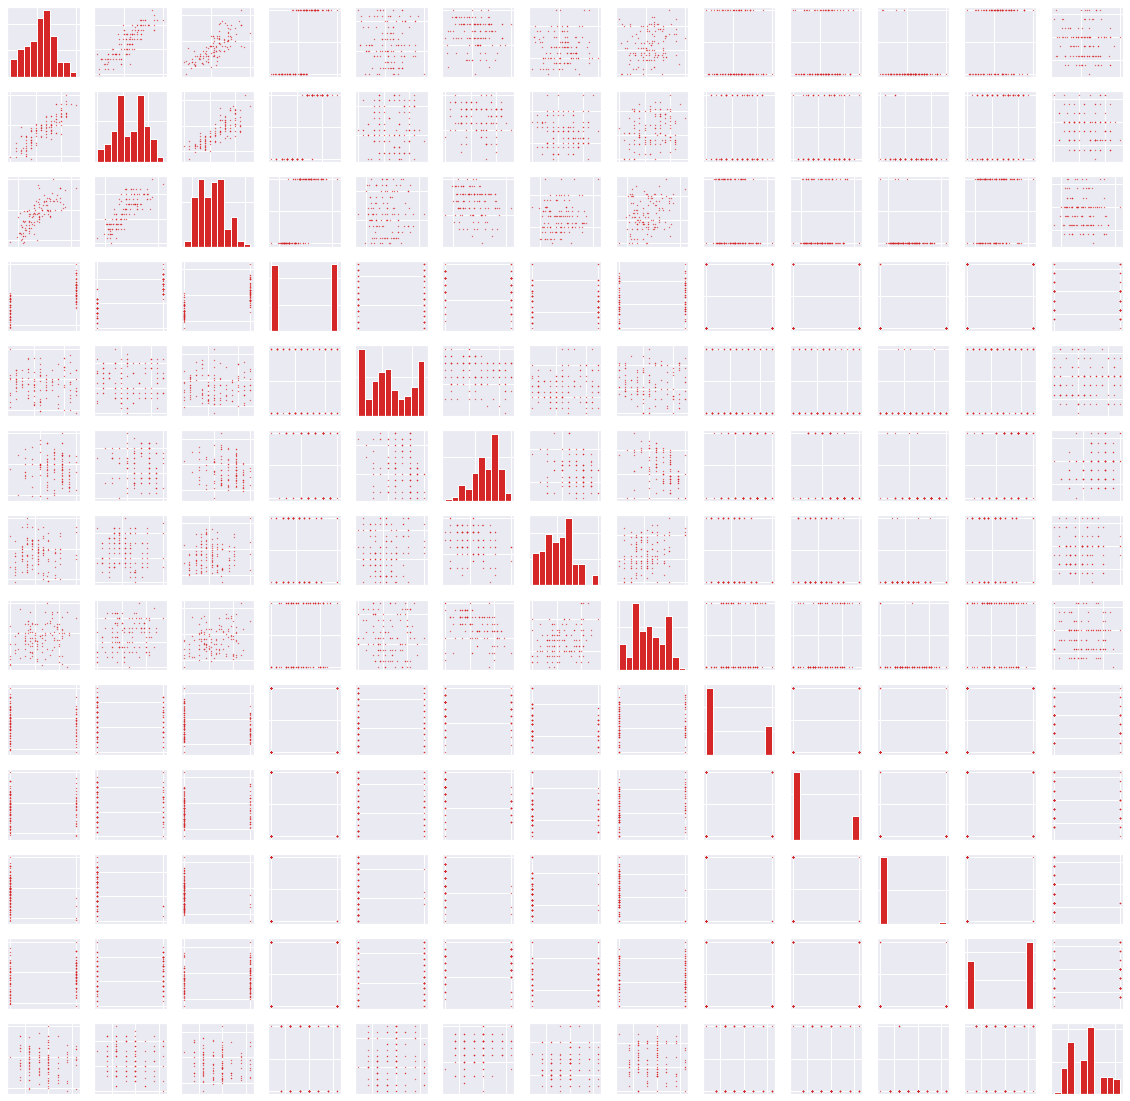

In [61]:

ncol=data.shape[1]
fig, axs = plt.subplots(ncol,ncol,figsize=(20,20))
for i in range(0,ncol):
    for j in range(0,ncol):
        if i==j:
            axs[i,j].hist(data.iloc[:,j],bins=10,density=True,color='tab:red')

            plt.setp(axs[i, j].get_xticklabels(), visible=False)
            plt.setp(axs[i, j].get_yticklabels(), visible=False)
        else:
            axs[i,j].scatter(data.iloc[:,i],data.iloc[:,j],s=0.1,color='tab:red')
            plt.setp(axs[i,j].get_xticklabels(), visible=False)
            plt.setp(axs[i, j].get_yticklabels(), visible=False)

plt.show()


#plt.rcParams['figure.figsize'] = [18, 3]
#plt.figure()
#sns.pairplot(data,corner=False)
#plt.show()


##### Erzeugen Sie aus dem vorhandenen Datensatz zwei neue Datensätze ohne fehlende Werte. Nutzen Sie dazu einmal das Eliminationsverfahren und einmal eine singuläre Imputation durch den Durchschnitt. Welchen Effekt erwarten Sie fur Varianz und Mean der einzelnen Variablen?

In [69]:
data_without=data.dropna()


Werte with NAN

In [80]:
mean=np.mean(data, axis=0)
sd=np.std(data, axis=0)
print(mean, sd)

Größe         176.943662
Schuhgröße     41.514184
2              69.434783
3               1.528169
4               6.176056
5              86.373239
6               2.587692
7               2.241844
8               0.323944
9               0.253521
10              0.035461
11              0.570423
12              4.390071
dtype: float64 Größe          8.973964
Schuhgröße     2.930606
2             12.112221
3              0.499206
4              3.291687
5              3.647513
6              0.883874
7              0.644910
8              0.467979
9              0.435027
10             0.184942
11             0.495016
12             1.662149
dtype: float64


Werte ohne NA

In [78]:
mean=np.mean(data_without, axis=0)
sd=np.std(data_without, axis=0)
print(mean, sd)

Größe         177.162602
Schuhgröße     41.463415
2              68.861789
3               1.504065
4               6.227642
5              86.691057
6               2.604065
7               2.208130
8               0.300813
9               0.260163
10              0.032520
11              0.585366
12              4.439024
dtype: float64

##### Berechnen Sie eine Distanzmatrix basierend auf den ersten 3 Merkmalen im Datensatz (Größe, Schuhgröße, Gewicht). Nutzen Sie dazu die L1-Distanz. Macht ein solches Vorgehen hier Sinn?

In [116]:
n=np.size(data,axis=0)

matrix=np.zeros(shape=(n,n))
data_3=data.iloc[:,:3]
for i in range(0,n):
    dat1=data.iloc[i,:]
    for j in range(0,n):
        dat2=data.iloc[j,:]
        matrix[i,j]=np.sum(np.abs(dat1-dat2))
print(matrix)


[[ 0.  42.1 54.7 ... 34.2 15.5 52.9]
 [42.1  0.  91.4 ... 35.9 45.2 85. ]
 [54.7 91.4  0.  ... 72.5 49.8 17.6]
 ...
 [34.2 35.9 72.5 ...  0.  27.3 63.1]
 [15.5 45.2 49.8 ... 27.3  0.  41.8]
 [52.9 85.  17.6 ... 63.1 41.8  0. ]]
